In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']

data = pd.read_csv('../datasets/all.csv')


In [38]:
tot_avg = data.groupby(['city', 'district', 'town'])['price'].mean().round(2).reset_index()

print(tot_avg)
tot_avg.to_csv('各板块平均价格.csv', index=False)

      city district       town    price
0       上海       嘉定      MAX未来  3840.83
1       上海       嘉定  V6时代新源商务楼  3016.67
2       上海       嘉定     V格时代广场  4412.50
3       上海       嘉定     YOHO街区  2900.00
4       上海       嘉定       万城银座  4720.00
...    ...      ...        ...      ...
25604  驻马店      驿城区  黄淮学院管理家属院   900.00
25605  驻马店      驿城区       鼎新小区  1257.14
25606  驻马店      驿城区     鼎盛新城一期  1200.00
25607  驻马店      驿城区       龙湾世家  1900.00
25608  驻马店      驿城区       龙源新城  1533.33

[25609 rows x 4 columns]


In [39]:
unit_avg = data.groupby(['city', 'district', 'town'])[['price', 'area']].apply(lambda x: pd.Series({
    'mean': (x['price'] / x['area']).mean().round(2),
})).reset_index()

print(unit_avg)
unit_avg.to_csv('各板块单位面积平均租金.csv', index=False)

      city district       town   mean
0       上海       嘉定      MAX未来  78.06
1       上海       嘉定  V6时代新源商务楼  53.28
2       上海       嘉定     V格时代广场  81.31
3       上海       嘉定     YOHO街区  60.89
4       上海       嘉定       万城银座  76.44
...    ...      ...        ...    ...
25604  驻马店      驿城区  黄淮学院管理家属院  12.33
25605  驻马店      驿城区       鼎新小区  10.68
25606  驻马店      驿城区     鼎盛新城一期  10.50
25607  驻马店      驿城区       龙湾世家  15.90
25608  驻马店      驿城区       龙源新城  10.76

[25609 rows x 4 columns]


<Figure size 640x480 with 0 Axes>

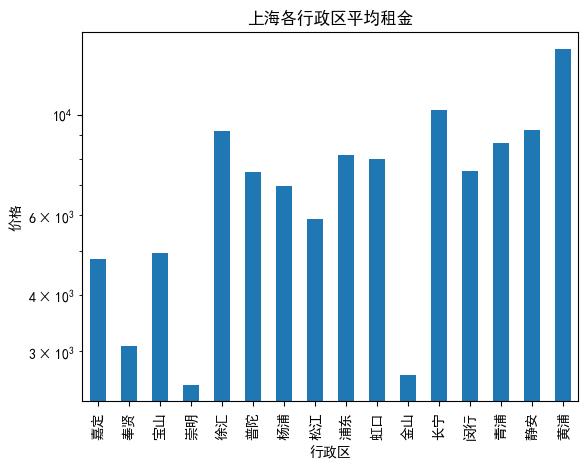

<Figure size 640x480 with 0 Axes>

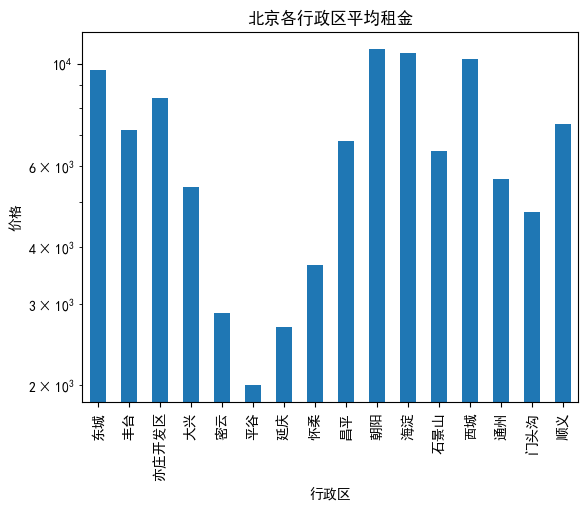

<Figure size 640x480 with 0 Axes>

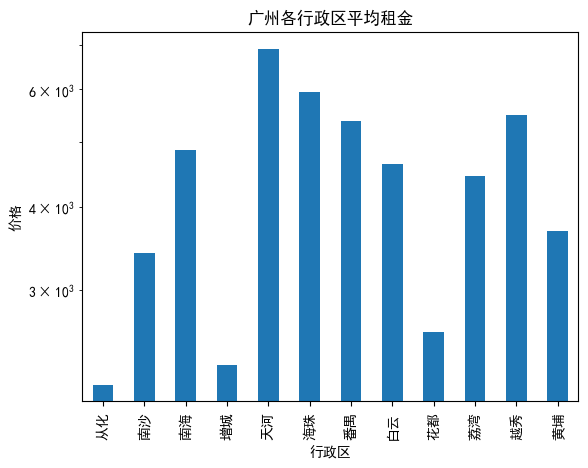

<Figure size 640x480 with 0 Axes>

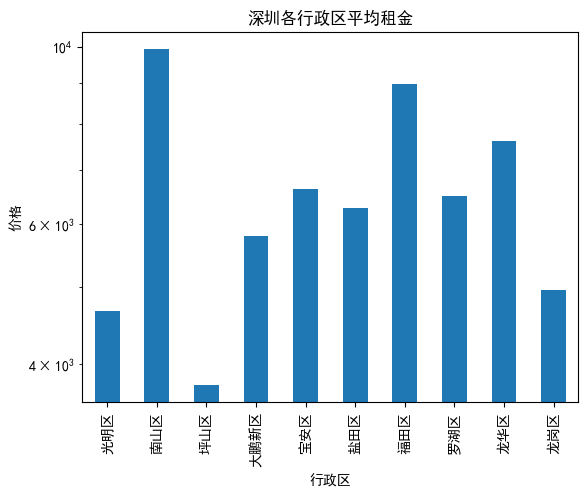

<Figure size 640x480 with 0 Axes>

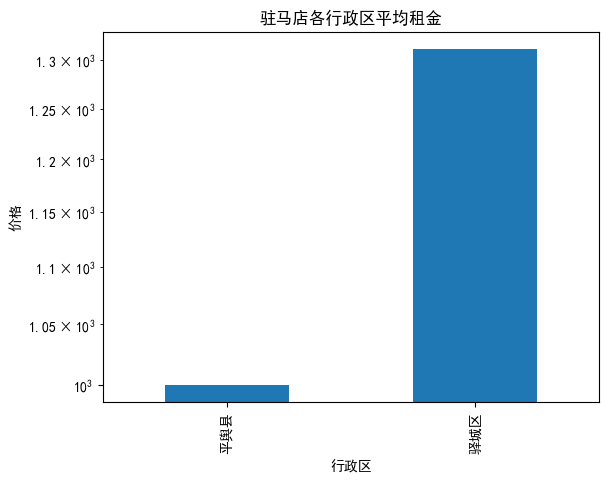

In [40]:
tot_dis_avg = data.groupby(['city', 'district'])[
    'price'].mean().round(2).reset_index()

for city in tot_dis_avg['city'].unique():
    city_data = tot_dis_avg[tot_dis_avg['city'] == city]
    
    plt.figure()
    city_data.plot(kind='bar', x='district', y='price', legend=False,
                   title=f'{city}各行政区平均租金', xlabel='行政区', ylabel='价格')
    plt.yscale('log')
    plt.savefig(f'imgs/{city}各行政区平均租金.png')

<Figure size 640x480 with 0 Axes>

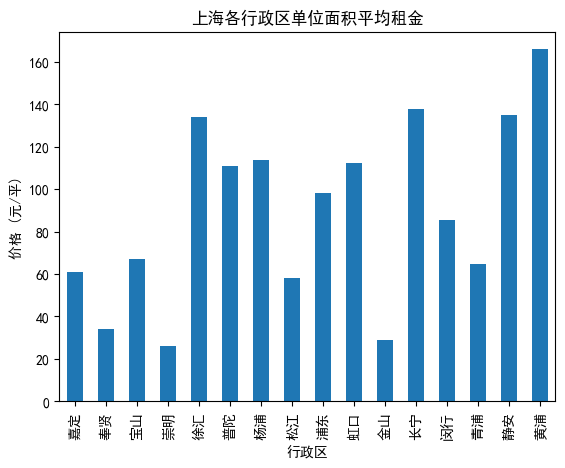

<Figure size 640x480 with 0 Axes>

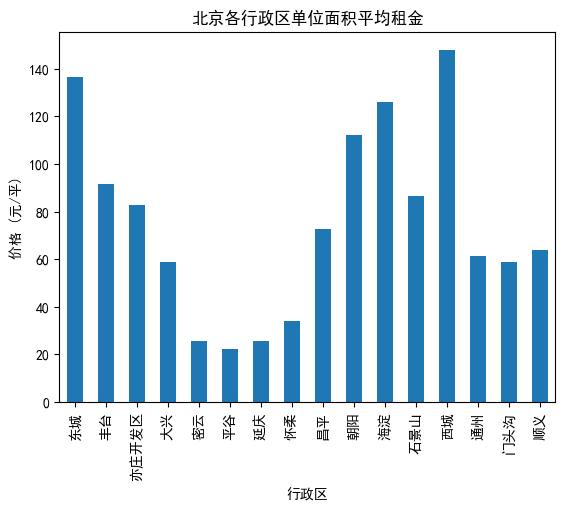

<Figure size 640x480 with 0 Axes>

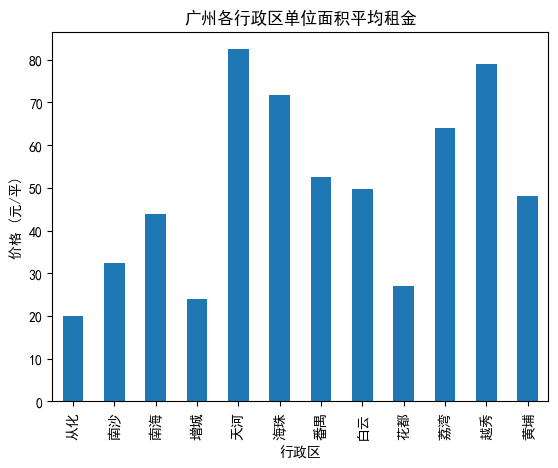

<Figure size 640x480 with 0 Axes>

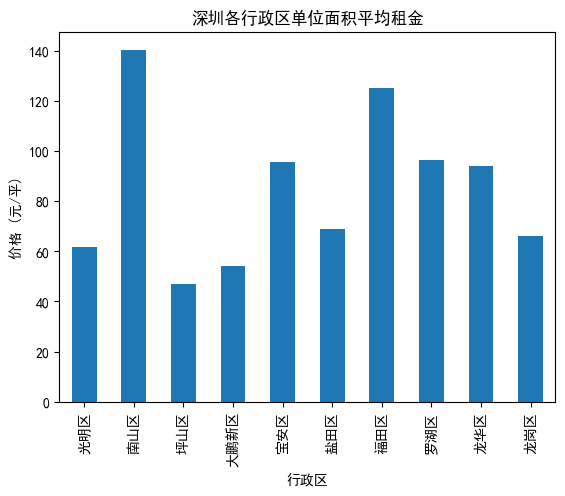

<Figure size 640x480 with 0 Axes>

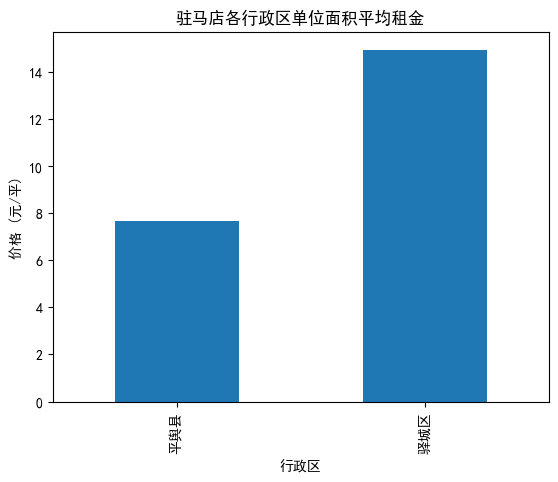

In [41]:
unit_dis_avg = data.groupby(['city', 'district'])[['price', 'area']].apply(lambda x: pd.Series({
    'mean': (x['price'] / x['area']).mean().round(2),
})).reset_index()

for city in unit_dis_avg['city'].unique():
    city_data = unit_dis_avg[unit_dis_avg['city'] == city]
    
    plt.figure()
    city_data.plot(kind='bar', x='district', y='mean', legend=False,
                   title=f'{city}各行政区单位面积平均租金', xlabel='行政区', ylabel='价格 (元/平)')

    plt.savefig(f'imgs/{city}各行政区单位面积平均租金.png')